In [1]:
import subprocess 
from subprocess import PIPE
import rasterio
import json
import glob 
import pandas as pd
import os
import numpy as np
import cv2

In [2]:
# This function takes as argument the a string contraining the a path for one image.
# It check if the first band is empty (if all pixels are zero) and if yes it returns True otherwise False.

def check_empty_img(url):
    image = cv2.imread(url+'/B01.tif',0)
  
    # Checking if the image is empty or not
    if (cv2.countNonZero(image) == 0):
        return  True
    else:
        return  False

In [3]:
# This function takes 4 bands and it stacks them into a single image

def stack_bands(path, product_id):
    print(path)

    
    band_list = ['B02.tif', 'B03.tif', 'B04.tif', 'B08.tif']
    try:
        
        # Read metadata of first file
        with rasterio.open(path +'/'+ band_list[0]) as src0:
            meta = src0.meta

        # Update meta to reflect the number of layers
        meta.update(count = len(band_list))

        # Read each layer and write it to stack
        with rasterio.open(path + '/' + 'stack.tif', 'w', **meta) as dst:
            for id, layer in enumerate(band_list, start=1):
                with rasterio.open(path +'/'+ layer) as src1:
                    dst.write_band(id, src1.read(1))
    except:
        print("Folder with no Data")
        remove_empty_folders(path)
        
        pass

In [4]:
def product_name(path):
    json_data=open(path+"/stac.json", "rb")
    jdata = json.load(json_data)
    
    return  jdata['id']

In [5]:
# This functions deletes a folder and its containds if no spectral band is included

def remove_empty_folders(path):
    subprocess.run(['rm', '-r', path])
    return

In [6]:
def label(path):
    # return thr label of each product which should be either Flood or not Flood, 
    # and convert it into 0 for not flood and 1 for flooded
    
    return

In [7]:
# Create a list with all the folders containing spectral bands


flist = []
rootdir = 'sen12floods_s2_source/'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist.append(d)
        
        
print(f"The number of folders are currently = {len(flist)}")

The number of folders are currently = 1949


In [8]:
# Iterate through all folders and create a new image with 4 spectral bands, namely Band2, Band3, Band4 and Band 8. 
# These bands correspend to blue, greem, red and infrared respectively

import stat
import shutil
for folder_path in flist:
    empty = check_empty_img(folder_path) #check if the first the folder contains empty images
    if empty:
        print("The images inside the current folder are empty - zero")
        #os.chmod(folder_path , stat.S_IWRITE)
        shutil.rmtree(folder_path)
    else:
        product_id = product_name(folder_path)
        stack_bands(folder_path, product_id)
    


sen12floods_s2_source/sen12floods_s2_source_0001_2018_12_18
sen12floods_s2_source/sen12floods_s2_source_0001_2018_12_23
sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_02
sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_12
sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_17
sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_22
sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_27
sen12floods_s2_source/sen12floods_s2_source_0001_2019_02_01
sen12floods_s2_source/sen12floods_s2_source_0001_2019_02_06
sen12floods_s2_source/sen12floods_s2_source_0004_2018_12_17
sen12floods_s2_source/sen12floods_s2_source_0004_2018_12_22
sen12floods_s2_source/sen12floods_s2_source_0004_2019_01_16
sen12floods_s2_source/sen12floods_s2_source_0005_2018_12_17
sen12floods_s2_source/sen12floods_s2_source_0005_2018_12_22
sen12floods_s2_source/sen12floods_s2_source_0005_2019_01_06
sen12floods_s2_source/sen12floods_s2_source_0005_2019_01_16
sen12floods_s2_source/sen12floods_s2_sou

In [9]:
# Iterate through the product list and count the number of folders once again an plot the new number.


flist_new = []
rootdir = 'sen12floods_s2_source'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist_new.append(d)
        
        
print(f"The number of folders after the pre-processing = {len(flist_new)}")

The number of folders after the pre-processing = 1949


##Modeling Section

In [10]:
# The local folder path where the labels are stored
path_labels = 'sen12floods_s2_labels'

# The local folder where the training images are stored
path_training_images = 'sen12floods_s2_source'

# The local folder where the testing images are stored
# path_testing_images = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/Images/test_images'

In [11]:
# This functions accepts as argument the name of the image and it searches for the coresponding label. 
# If the image depicts a flooded area then it returns the number one (1) otherwise it returns the number zero (0)

def image_label(product_id):
    
    rootdir = "sen12floods_s2_labels"
    pd = product_id.split("_")
    pd = "_" + pd[3] + "_" + pd[4] + "_" + pd[5] + "_" + pd[6]
    
    json_data=open("sen12floods_s2_labels/" + rootdir + pd +"/stac.json", "rb")
    jdata = json.load(json_data)
    flood = jdata["properties"]["FLOODING"]
    

    if (flood == "False"):
        image_label = 0
    else:
        image_label = 1
    #print(image_label)
    return image_label

In [12]:
# This function it accepts as argument the path of the folder where the image is stored.
# Inside this folder there is a json file containing the product id as a property
# It return the product id

def product_name(path):
    
    json_data=open(path+"/stac.json", "rb")
    jdata = json.load(json_data)
    
    return  jdata['id']

In [13]:
# Create a list with all the folders containing spectral bands


imagelist = []
rootdir = path_training_images
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of training samples is currently = {len(imagelist)}")

The number of training samples is currently = 1949


In [14]:
# This function is responsible for constructing the dataset in a way compatible with keras.
# It iterates through folders and searches for images along with their coresponding label.

def load_data():
    
    data = [] 
    images = []
    labels = []
    
    for folder in imagelist:
        product_id = product_name(folder)
        label = image_label(product_id)
    
        # Open the img
        image = cv2.imread(folder + "/stack.tif")
        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)

        
        
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
        
    #print(images, labels)    
    data.append([images, labels])     

    return images, labels

In [15]:
train_images, train_labels = load_data()

In [16]:
# Calculate the number of images in the training set 
# containing Flooded areas and the number of images that does not contain flooded areas

(unique, counts) = np.unique(train_labels, return_counts=True)

print(unique, counts)
#print(f"The number of images in the train dataset containing flooded areas is {counts[1]}\n")
#print(f"While the number of images clean from floods is {counts[0]}")

[0 1] [1500  449]


In [17]:
# Import the Deep Learing modules
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import pydot


import tensorflow as tf

import cv2
import os

import numpy as np

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (512, 512, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, batch_size=28, epochs=20, validation_split = 0.2)

Epoch 1/20
56/56 [==============================] - 245s 4s/step - loss: 17.7318 - accuracy: 0.7280 - val_loss: 0.6285 - val_accuracy: 0.7769
Epoch 2/20
56/56 [==============================] - 239s 4s/step - loss: 0.4480 - accuracy: 0.8525 - val_loss: 0.5992 - val_accuracy: 0.7897
Epoch 3/20
56/56 [==============================] - 229s 4s/step - loss: 0.2423 - accuracy: 0.9070 - val_loss: 0.6344 - val_accuracy: 0.7769
Epoch 4/20
56/56 [==============================] - 228s 4s/step - loss: 0.1958 - accuracy: 0.9384 - val_loss: 0.7560 - val_accuracy: 0.7692
Epoch 5/20
56/56 [==============================] - 224s 4s/step - loss: 0.1743 - accuracy: 0.9519 - val_loss: 0.7792 - val_accuracy: 0.7667
Epoch 6/20
56/56 [==============================] - 227s 4s/step - loss: 0.1686 - accuracy: 0.9615 - val_loss: 0.8075 - val_accuracy: 0.7410
Epoch 7/20
56/56 [==============================] - 235s 4s/step - loss: 0.0867 - accuracy: 0.9731 - val_loss: 0.8613 - val_accuracy: 0.7128
Epoch 8/20
5

In [22]:
model.save("./my_model.h5")

In [23]:
model.save("./my_model_raw")

INFO:tensorflow:Assets written to: ./my_model_raw\assets


INFO:tensorflow:Assets written to: ./my_model_raw\assets


In [24]:
model = keras.models.load_model('./my_model_raw')

In [27]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

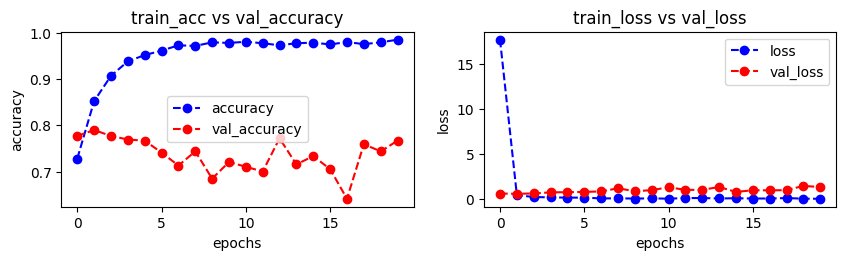

In [28]:
plot_accuracy_loss(history)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 508032)            0         
                                                                 
 dense (Dense)               (None, 128)               6